In [1]:
from TransversalitySheaf import *
from ConleySheaf import *
from FlowSheaf import *
from pychomp import *
from Model import *
import graphviz

import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
model_name = 'replicator1DTemp'
model = Model(model_name)

In [3]:
T = -2
params = T
# a,b = 5,-5
# params = a,b

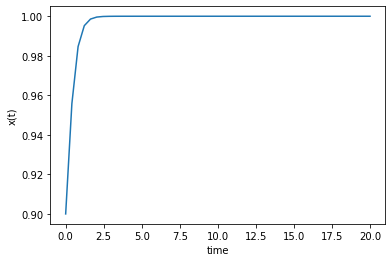

In [4]:
model.simulate([.9],params)

In [5]:
base = GeometricCubicalComplex(model.base_bounds,model.base_boxes)
B = base.complex

In [6]:
phase_complex = GeometricCubicalComplex(model.phase_bounds, model.phase_boxes)
X = phase_complex.complex

In [7]:
C, discrete_flow = TransversalityComplex(phase_complex, model.ODE_Model,params,model.num_samples)
FC = FlowComplex(C, discrete_flow)

In [8]:
GC = GradedComplexObj.induce_from_flow(FC.complex, lambda x: FC.discrete_flow[x])

In [9]:
#DrawGradedComplex(GC.graded_complex,GC.poset)

In [10]:
conley_complex = ConnectionMatrix(GC.graded_complex)
poset = GC.poset
#DrawGradedComplex(conley_complex,poset)

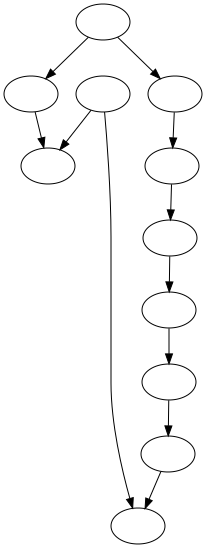

In [11]:
poset

In [12]:
#dot = graphviz.Source(poset.children_.graphviz())
#dot.render('test-output/round-table.gv', view=True) 

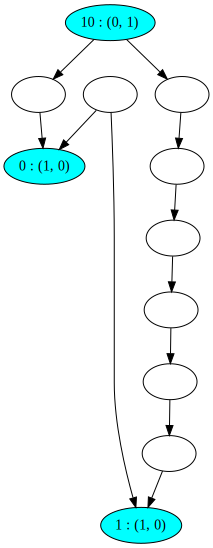

In [13]:
df = DrawGradedComplex(conley_complex,poset)
df

In [14]:
#dot = graphviz.Source(df.graphviz())
#dot.render('test-output/GC.gv', view=True) 

In [15]:
recurrent_poset = Poset(InducedSubgraph(TransitiveClosure(poset.get_children()),
                                                lambda v : v in conley_complex.count()))

In [16]:
df = DrawGradedComplex(conley_complex,recurrent_poset)

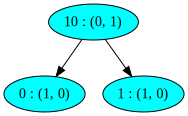

In [17]:
df

In [18]:
#dot = graphviz.Source(df.graphviz())
#dot.render('test-output/CMG.gv') 

In [19]:
#Lift Generators

In [20]:
def lift(chain, tower):
    for m in reversed(tower[1:]):
        chain = m.complex().lift(chain)
    return chain

In [21]:
CMTower = ConnectionMatrixTower(GC.graded_complex)

In [22]:
for cell in conley_complex.complex():
    print(cell,lift({cell},CMTower))

0 {1}
1 {10}
2 {12, 13, 14, 15, 16, 17, 18, 19, 20}
